# 2. XGBoost

In [1]:
# Bibliotecas básicas 
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns

# Definições estéticas
plt.style.use('ggplot')
color_pal = sns.color_palette()
sns.set(rc={'figure.figsize':(20,10)})

In [2]:
# Base de dados
treino = pd.read_csv('/content/treino.csv')
treino = treino.set_index('Datetime')
treino.index = pd.to_datetime(treino.index)

teste = pd.read_csv('/content/teste.csv')
teste = teste.set_index('Datetime')
teste.index = pd.to_datetime(teste.index)

In [3]:
# Importando bibliotecas
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

In [4]:
# Função para criar características do datetime e separar X e y
# X são as variáveis e y é o dado de interesse
def create_xy(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [5]:
X_treino, y_treino = create_xy(treino, label='PJME_MW')
X_teste, y_teste = create_xy(teste, label='PJME_MW')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [6]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_treino, y_treino,
        eval_set=[(X_treino, y_treino), (X_teste, y_teste)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

[16:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

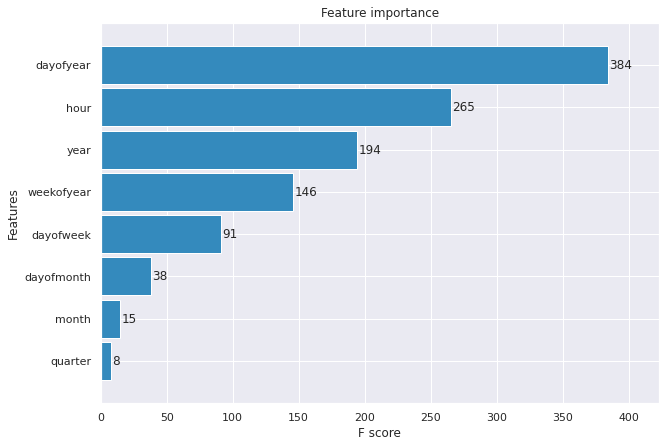

In [7]:
# Importância das variáveis
ax = plot_importance(reg, 
                    height=0.9, 
                    color=color_pal[1])
fig = ax.figure
fig.set_size_inches(10, 7)

In [8]:
# Prevendo os valores
teste['XGBoost'] = reg.predict(X_teste)

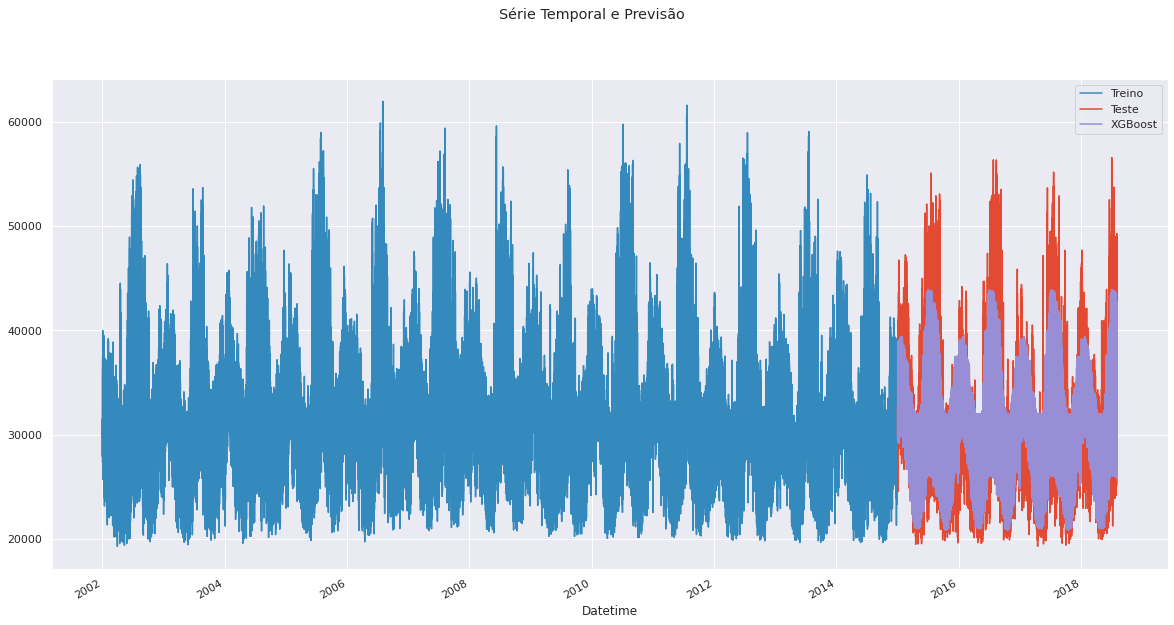

In [9]:
# Plotando o gráfco
treino['PJME_MW'].plot(legend=True, label='Treino', color=color_pal[1]) 
teste['PJME_MW'].plot(legend=True, label='Teste', color=color_pal[0])

teste['XGBoost'].plot(legend=True, label='XGBoost', color=color_pal[2])

plot = plt.suptitle('Série Temporal e Previsão')

In [10]:
teste.head()

,PJME_MW,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,XGBoost
Datetime,,,,,,,,,,,
2015-01-01 00:00:00,32802.0,2015-01-01 00:00:00,0,3,1,1,2015,1,1,1,32394.703125
2015-12-31 01:00:00,24305.0,2015-12-31 01:00:00,1,3,4,12,2015,365,31,53,28042.375000
2015-12-31 02:00:00,23156.0,2015-12-31 02:00:00,2,3,4,12,2015,365,31,53,27063.408203
2015-12-31 03:00:00,22514.0,2015-12-31 03:00:00,3,3,4,12,2015,365,31,53,26588.355469
2015-12-31 04:00:00,22330.0,2015-12-31 04:00:00,4,3,4,12,2015,365,31,53,26588.355469


# 1.2 Exportando valores preditos

In [11]:
# Bibliotecas
import csv
from google.colab import files

In [12]:
# Copiando as colunas de interesse
teste_xgb = teste['XGBoost'].copy()

# Transformando de Series para DataFrame
teste_xgb = pd.DataFrame(teste_xgb)

# Transformando para csv
teste_xgb.to_csv('teste_xgb.csv')

In [15]:
# A célula anterior deixa o csv na máquina virtual
# Para guardar na computador
# files.download("teste_xgb.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>